In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('train.csv')
print(f"Veri Seti Boyutu: {df.shape}")
df.head()

Veri Seti Boyutu: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
# Hangi sütunda ne kadar eksik var?
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Toplam Eksik', 'Yüzde'])
print(missing_data.head(20))

              Toplam Eksik     Yüzde
PoolQC                1453  0.995205
MiscFeature           1406  0.963014
Alley                 1369  0.937671
Fence                 1179  0.807534
MasVnrType             872  0.597260
FireplaceQu            690  0.472603
LotFrontage            259  0.177397
GarageQual              81  0.055479
GarageFinish            81  0.055479
GarageType              81  0.055479
GarageYrBlt             81  0.055479
GarageCond              81  0.055479
BsmtFinType2            38  0.026027
BsmtExposure            38  0.026027
BsmtCond                37  0.025342
BsmtQual                37  0.025342
BsmtFinType1            37  0.025342
MasVnrArea               8  0.005479
Electrical               1  0.000685
Condition2               0  0.000000


In [10]:
# 1. Kategorik olanları "None" ile doldur
cols_fill_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                  'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                  'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                  'MasVnrType']

for col in cols_fill_none:
    df[col] = df[col].fillna("None")

# 2. Sayısal olup 'Yok' anlamına gelenleri 0 ile doldur
cols_fill_zero = ['GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea']
for col in cols_fill_zero:
    df[col] = df[col].fillna(0)

# 3. LotFrontage verisi kayıpsa ortalama ile doldur
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

# 4. Geriye kalan tek tük eksikler için en çok tekrar edeni ata
df = df.fillna(df.mode().iloc[0])

# Hiç eksik kaldı mı?
print("Kalan toplam eksik veri sayısı:", df.isnull().sum().sum())

Kalan toplam eksik veri sayısı: 0


In [11]:
# Hedef (Fiyat) ve özellikleri ayırma
y = df['SalePrice']
X = df.drop('SalePrice', axis=1)

# One-Hot Encoding: Sözel sütunları 1-0 sütunlarına çevir
X_encoded = pd.get_dummies(X, drop_first=True)

print("Kategorik dönüşüm öncesi değişken sayısı:", X.shape[1])
print("Kategorik dönüşüm sonrası değişken sayısı:", X_encoded.shape[1])

Kategorik dönüşüm öncesi değişken sayısı: 80
Kategorik dönüşüm sonrası değişken sayısı: 260


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Veriyi ölçekle
X_scaled_array = scaler.fit_transform(X_encoded)

# Array'i tekrar DataFrame'e çevir
X_final = pd.DataFrame(X_scaled_array, columns=X_encoded.columns)
print(X_final.head())

         Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0 -1.730865    0.073375    -0.229372 -0.207142     0.651479    -0.517200   
1 -1.728492   -0.872563     0.451936 -0.091886    -0.071836     2.179628   
2 -1.726120    0.073375    -0.093110  0.073480     0.651479    -0.517200   
3 -1.723747    0.309859    -0.456474 -0.096897     0.651479    -0.517200   
4 -1.721374    0.073375     0.633618  0.375148     1.374795    -0.517200   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  \
0   1.050994      0.878668    0.514104    0.575425  ...       -0.058621   
1   0.156734     -0.429577   -0.570750    1.171992  ...       -0.058621   
2   0.984752      0.830215    0.325915    0.092907  ...       -0.058621   
3  -1.863632     -0.720298   -0.570750   -0.499274  ...       -0.058621   
4   0.951632      0.733308    1.366489    0.463568  ...       -0.058621   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0       -0.058621     -0.30196

In [13]:
from sklearn.model_selection import train_test_split

# %80 eğitim, %20 test olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

print(f"Eğitim Seti Boyutu: {X_train.shape}")
print(f"Test Seti Boyutu: {X_test.shape}")

Eğitim Seti Boyutu: (1168, 260)
Test Seti Boyutu: (292, 260)


Eğitim Seti Boyutu: (1168, 259)
------------------------------
------------------------------

Seçilen En İyi Ridge Lambda: 625.0552
Seçilen En İyi Lasso Lambda: 4537.9541
------------------------------


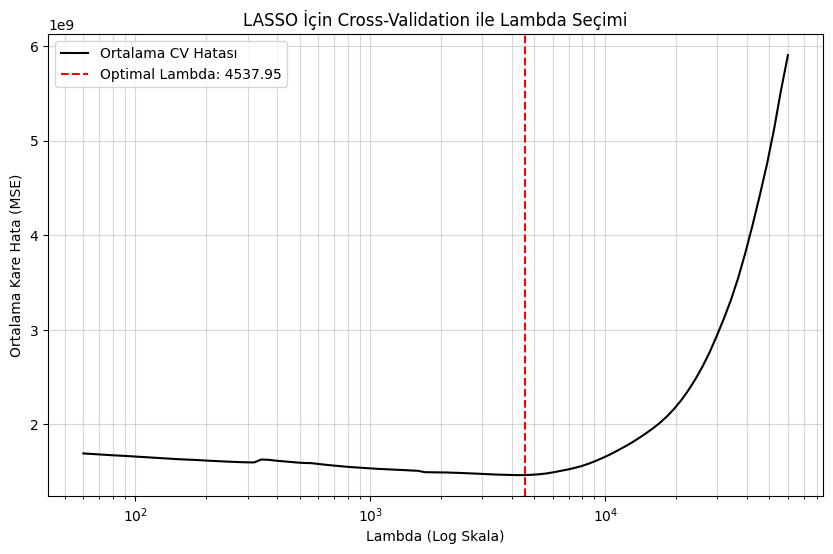


 PERFORMANS KARŞILAŞTIRMA SONUÇLARI
             Metrik  Ridge Regresyon  LASSO Regresyon
        RMSE (Hata)     33696.427259     36940.559622
        R² (Başarı)         0.851969         0.822093
    Toplam Değişken       259.000000       259.000000
Kullanılan Değişken       258.000000        28.000000
    Elenen Değişken         1.000000       231.000000


In [14]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ID SÜTUNUNU TEMİZLEME
if 'Id' in X_train.columns:
    X_train = X_train.drop('Id', axis=1)
    X_test = X_test.drop('Id', axis=1)

print(f"Eğitim Seti Boyutu: {X_train.shape}")
print("-" * 30)

# RIDGE VE LASSO EĞİTİMİ

# 1. RIDGE MODELİ (Cross-Validation ile)
ridge_alphas = np.logspace(-2, 3, 50)
ridge_cv = RidgeCV(alphas=ridge_alphas, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)

# 2. LASSO MODELİ (Cross-Validation ile)
lasso_cv = LassoCV(cv=5, random_state=42, max_iter=50000, n_jobs=-1)
lasso_cv.fit(X_train, y_train)

print("-" * 30)
print(f"\nSeçilen En İyi Ridge Lambda: {ridge_cv.alpha_:.4f}")
print(f"Seçilen En İyi Lasso Lambda: {lasso_cv.alpha_:.4f}")
print("-" * 30)

# LAMBDA SEÇİMİ GRAFİĞİ

plt.figure(figsize=(10, 6))
plt.semilogx(lasso_cv.alphas_, lasso_cv.mse_path_.mean(axis=-1), 'k', label='Ortalama CV Hatası')
plt.axvline(lasso_cv.alpha_, linestyle='--', color='red', label=f'Optimal Lambda: {lasso_cv.alpha_:.2f}')

plt.xlabel('Lambda (Log Skala)')
plt.ylabel('Ortalama Kare Hata (MSE)')
plt.title('LASSO İçin Cross-Validation ile Lambda Seçimi')
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.show()

# PERFORMANS ÖLÇÜMÜ (TEST AŞAMASI)

# Modelleri test verisiyle deniyoruz
y_pred_ridge = ridge_cv.predict(X_test)
y_pred_lasso = lasso_cv.predict(X_test)

# 1. HATA METRİKLERİ (RMSE ve R2)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

# 2. DEĞİŞKEN SEÇİMİ (SPARSITY) ANALİZİ
# Katsayısı 0 olmayan değişkenleri sayıyoruz
ridge_vars = np.sum(ridge_cv.coef_ != 0)
lasso_vars = np.sum(lasso_cv.coef_ != 0)
total_vars = X_train.shape[1]

# SONUÇ TABLOSU
results_df = pd.DataFrame({
    'Metrik': ['RMSE (Hata)', 'R² (Başarı)', 'Toplam Değişken', 'Kullanılan Değişken', 'Elenen Değişken'],
    'Ridge Regresyon': [rmse_ridge, r2_ridge, total_vars, ridge_vars, total_vars - ridge_vars],
    'LASSO Regresyon': [rmse_lasso, r2_lasso, total_vars, lasso_vars, total_vars - lasso_vars]
})

print("\n" + "="*50)
print(" PERFORMANS KARŞILAŞTIRMA SONUÇLARI")
print("="*50)
print(results_df.to_string(index=False))